In [1]:
import pandas as pd
import numpy as np

In [ ]:
Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [ ]:
ls

In [2]:
data = pd.read_excel('marketing_customer_analysis.xlsx')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [ ]:
data.describe()

In [ ]:
print(data.dtypes)
display(data)

In [ ]:
data['Response'].unique()
data['Response'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns 
%matplotlib inline

In [ ]:
data1 = data.copy()

In [ ]:
data1['Response'].hist(bins=4)
plt.show()

In [ ]:
data1['Sales Channel'].unique()
data1['Sales Channel'].value_counts()

In [ ]:
sns.histplot(x=data1['Response'], y=data1['Sales Channel'], data=data, bins = 20)
plt.show()

In [ ]:
data1['Total Claim Amount'].unique()
data1['Total Claim Amount'].value_counts()

In [ ]:
sns.histplot(x=data1['Response'], y=data1['Total Claim Amount'], data=data, bins = 20)
plt.show()

In [ ]:
fig, ax1 = plt.subplots(2,1,figsize=(10,10)) # figsize=(width,height)
sns.boxplot(x=data1['Response'], y=data1['Income'], data=data, ax = ax1[0])
#sns.histplot(x=data1['Response'], hue=data1['Income'], data=data, ax = ax1[1])
plt.show()


Complete the following task
----------------------------------
Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables

- Use Matplotlib to construct histograms

- Do the distributions for different numerical variables look like a normal distribution? It does not have the normal distribution. 

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,NaN,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [17]:
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
#display(nulls_df)
nulls_df = nulls_df.reset_index()
#nulls_df
#nulls_df.T
#display(nulls_df.head())
nulls_df.columns = ['Months Since Last Claim', 'percent_nulls']
nulls_df
#nulls_df = nulls_df.rename(columns = {'index': 'header_name', 0:'percent_nulls'})
#display(nulls_df.head())

,Months Since Last Claim,percent_nulls
0,Customer,0.00
1,State,5.78
2,Customer Lifetime Value,0.00
3,Response,5.78
4,Coverage,0.00
5,Education,0.00
6,Effective To Date,0.00
7,EmploymentStatus,0.00
8,Gender,0.00
9,Income,0.00


In [5]:
print(data.shape)
print(list(data.columns))

(10910, 25)
['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size', 'Vehicle Type']


In [10]:
#categorical columns
data3= data.copy()
data_nan_categorical = data3.select_dtypes([object]).isna().sum()
print("NaN categorical:\n", data_nan_categorical)

NaN categorical:
 Customer               0
State                631
Response             631
Coverage               0
Education              0
EmploymentStatus       0
Gender                 0
Location Code          0
Marital Status         0
Policy Type            0
Policy                 0
Renew Offer Type       0
Sales Channel          0
Vehicle Class        622
Vehicle Size         622
Vehicle Type        5482
dtype: int64


In [9]:
#numerical columns
data_nan_numerical = data3.select_dtypes(['int','float']).isna().sum()
print("NaN numerical: \n",data_nan_numerical)

NaN numerical: 
 Customer Lifetime Value            0
Income                             0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Total Claim Amount                 0
dtype: int64


In [11]:
display(data3['Months Since Last Claim'].unique())
display(data3['Months Since Last Claim'].value_counts())

array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: Months Since Last Claim, dtype: int64

In [16]:
mean_months_since_last_claim = data3['Months Since Last Claim'].mean()
print(mean_months_since_last_claim)
data3['Months Since Last Claim'] = data3['Months Since Last Claim'].fillna(mean_months_since_last_claim)

15.149070740488469


In [18]:
data3['Months Since Last Claim'].isna().sum()

0

In [19]:
display(data3['Number of Open Complaints'].unique())
display(data3['Number of Open Complaints'].value_counts())

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: Number of Open Complaints, dtype: int64

In [21]:
data3['Number of Open Complaints'] = data3['Number of Open Complaints'].fillna(0.0)
len(data3['Number of Open Complaints'].isna()==True)

10910

In [23]:
display(data3['Number of Open Complaints'].unique())

array([0., 3., 1., 2., 4., 5.])

In [ ]:
#Use seaborn library to construct distribution plots for the numerical variables

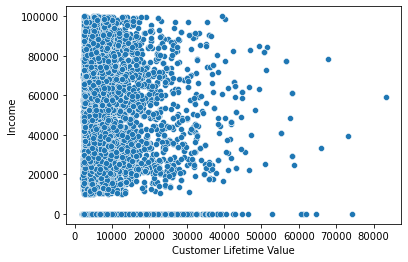

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.scatterplot(x='Customer Lifetime Value',y='Income',data=data3)
plt.show()



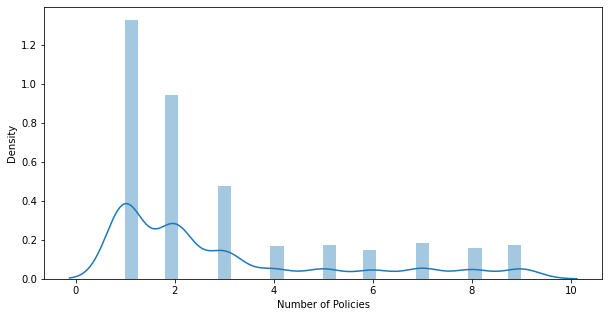

In [53]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(data3["Number of Policies"], ax = ax)
plt.show()

In [54]:
#numerical columns
data_nan_numerical = data3.select_dtypes(['int','float']).isna().sum()
print("NaN numerical: \n",data_nan_numerical)

NaN numerical: 
 Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64


In [55]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
y = data3['Customer Lifetime Value']
X = data3[['Total Claim Amount']]

In [87]:
type(y)

pandas.core.series.Series

In [88]:
type(X)

pandas.core.frame.DataFrame

In [89]:
lm =LinearRegression()

In [90]:
#X is the column to make prediction
lm.fit(X,y)
print(lm.intercept_) #b_0
print(lm.coef_) # b_1

5634.309535610237
[5.48170966]


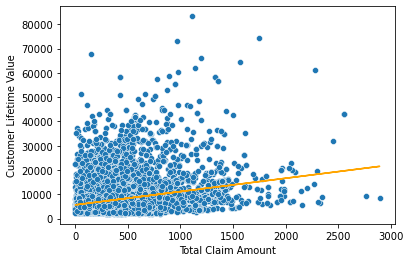

In [91]:
#regression line = b_0+b_1*x
regression_line = lm.intercept_+lm.coef_[0]*data3['Total Claim Amount']
plt.plot(data3['Total Claim Amount'], regression_line, c='orange')
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data = data3)
plt.show()

In [92]:
data4 = data3[['Total Claim Amount']].copy()
data4.columns = ["Y_real"]
data4['y_predict'] = lm.predict(X)
data4['error'] = data4['Y_real'] - data4['y_predict']
data4

,Y_real,y_predict,error
0,292.800000,7239.354124,-6946.554124
1,744.924331,9717.768437,-8972.844106
2,480.000000,8265.530173,-7785.530173
3,484.013411,8287.530526,-7803.517115
4,707.925645,9514.952383,-8807.026738
...,...,...,...
10905,1214.400000,12291.297747,-11076.897747
10906,273.018929,7130.920036,-6857.901107
10907,381.306996,7724.523779,-7343.216783
10908,618.288849,9023.589492,-8405.300643


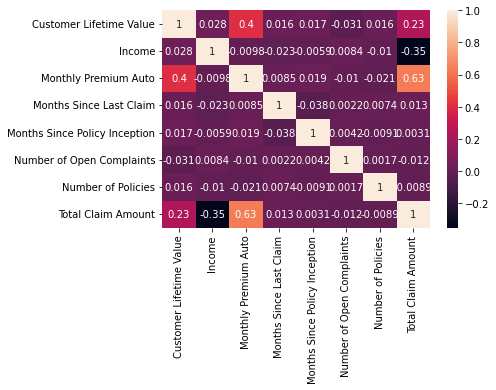

In [93]:
correlations_matrix = data3.corr()
sns.heatmap(correlations_matrix, annot=True) 
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9).
Write code for both the correlation matrix and for seaborn heatmap. If there 
is no pair of features that have a high correlation, then do not drop any features

I could do this part, because i do not have idea how can i do it. 

In [94]:
ls

Lab-customer-analysis.2-Mary.ipynb
lab customer analysis round 3 Mary.ipynb
marketing_customer_analysis.xlsx
merged_clean_ver1.xlsx
merged_clean_ver2.xlsx


In [95]:
procesingData = data3.copy()

In [96]:
procesingData.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029.0,...,0.0,9.0,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0.0,...,0.0,1.0,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139.0,...,0.0,2.0,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078.0,...,0.0,2.0,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675.0,...,0.0,7.0,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [104]:
data_nan_numerical = data3.select_dtypes(['int','float']).isna().sum()
print("NaN numerical: \n",data_nan_numerical)

NaN numerical: 
 Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Total Claim Amount               0
dtype: int64


In [103]:
procesingData.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,10910.0,15.149071,9.783520,0.000000,7.000000,15.000000,23.000000,35.000000
Months Since Policy Inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


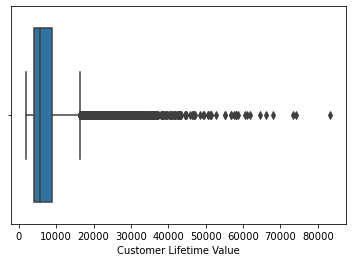

In [114]:
sns.boxplot(x=procesingData['Customer Lifetime Value'])
plt.show()

/var/folders/p_/v2yjf7kn4gz7xhk4xpgmlk7c0000gn/T/ipykernel_31014/2857328054.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[(procesingData['Customer Lifetime Value']>lower_limit) & (procesingData['Customer Lifetime Value']<upper_limit)]


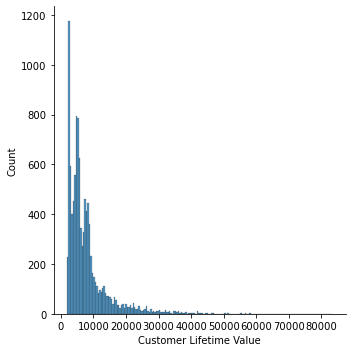

In [124]:
iqr = np.percentile(procesingData['Customer Lifetime Value'],75) - np.percentile(procesingData['Customer Lifetime Value'],25)
upper_limit = np.percentile(procesingData['Customer Lifetime Value'],75) + 1.5*iqr
lower_limit = np.percentile(procesingData['Customer Lifetime Value'],25) - 1.5*iqr
data = data[(procesingData['Customer Lifetime Value']>lower_limit) & (procesingData['Customer Lifetime Value']<upper_limit)]
sns.displot(procesingData['Customer Lifetime Value'])
plt.show()
#End Acivity1


In [122]:
lower_limit

-3453.035923

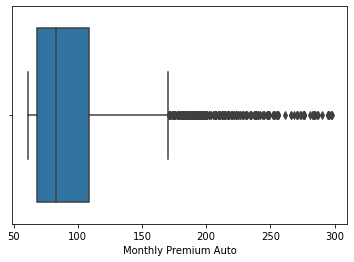

In [115]:
sns.boxplot(x=procesingData['Monthly Premium Auto'])
plt.show()

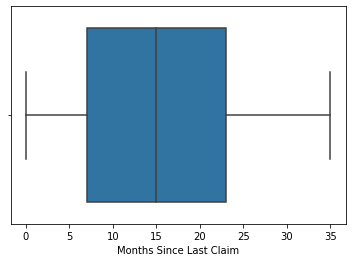

In [116]:
sns.boxplot(x=procesingData['Months Since Last Claim'])
plt.show()

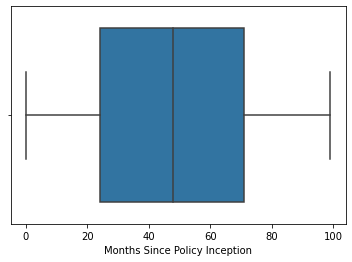

In [117]:
sns.boxplot(x=procesingData['Months Since Policy Inception'])
plt.show()

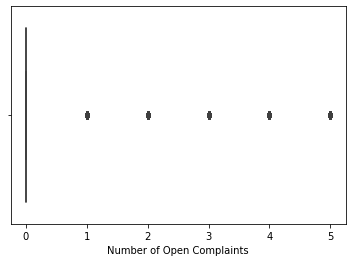

In [118]:
sns.boxplot(x=procesingData['Number of Open Complaints'])
plt.show()

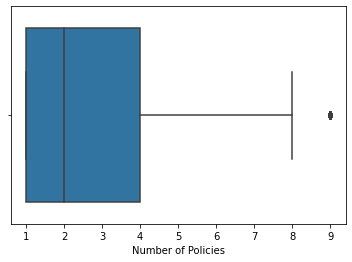

In [119]:
sns.boxplot(x=procesingData['Number of Policies'])
plt.show()

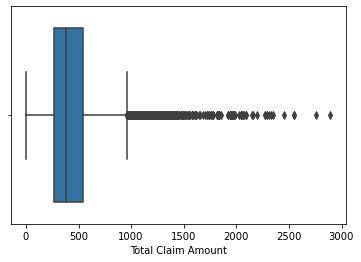

In [120]:
sns.boxplot(x=procesingData['Total Claim Amount'])
plt.show()

In [127]:
df = procesingData[['Customer Lifetime Value','Monthly Premium Auto','Number of Policies',
                    'Total Claim Amount']]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
Monthly Premium Auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
Number of Policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678


In [130]:
y = df['Total Claim Amount']
X = df.drop(['Total Claim Amount'],axis = 1)

In [131]:
X.head()

,Customer Lifetime Value,Monthly Premium Auto,Number of Policies
0,4809.216960,61.0,9.0
1,2228.525238,64.0,1.0
2,14947.917300,100.0,2.0
3,22332.439460,97.0,2.0
4,9025.067525,117.0,7.0


In [132]:
X_num = X.select_dtypes(include = np.number)

In [133]:
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num) 
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns) 
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (10910, 3)


,Customer Lifetime Value,Monthly Premium Auto,Number of Policies
0,0.035752,0.000000,1.000
1,0.004059,0.012658,0.000
2,0.160264,0.164557,0.125
3,0.250953,0.151899,0.125
4,0.087527,0.236287,0.750


In [134]:
x_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,0.075162,0.084555,0.0,0.025992,0.047566,0.087130,1.0
Monthly Premium Auto,10910.0,0.135848,0.145327,0.0,0.029536,0.092827,0.202532,1.0
Number of Policies,10910.0,0.247399,0.299920,0.0,0.000000,0.125000,0.375000,1.0


In [135]:
from sklearn.preprocessing import StandardScaler
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_num) 
x_standardized = Standardtransformer.transform(X_num) 
print("The numpy array looks like this: ",x_standardized)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_standardized),x_standardized.shape))
x_standardized = pd.DataFrame(x_standardized,columns=X_num.columns)
x_standardized.head()

The numpy array looks like this:  [[-0.46610505 -0.93481904  2.50945468]
 [-0.84094593 -0.84771343 -0.82492205]
 [ 1.00652314  0.19755381 -0.40812496]
 ...
 [ 2.30582467  3.13010912 -0.40812496]
 [ 0.5742732   1.88159547  1.25906341]
 [-0.16859268  0.22658901  0.00867213]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (10910, 3)


,Customer Lifetime Value,Monthly Premium Auto,Number of Policies
0,-0.466105,-0.934819,2.509455
1,-0.840946,-0.847713,-0.824922
2,1.006523,0.197554,-0.408125
3,2.079112,0.110448,-0.408125
4,0.146240,0.691152,1.675860


In [136]:
x_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,10910.0,-1.475065e-16,1.000046,-0.888953,-0.581543,-0.326386,0.141550,10.938228
Monthly Premium Auto,10910.0,8.207357e-17,1.000046,-0.934819,-0.731573,-0.296045,0.458871,5.946524
Number of Policies,10910.0,-4.422480e-17,1.000046,-0.824922,-0.824922,-0.408125,0.425469,2.509455


In [138]:
pd.concat([X_num,x_normalized,x_standardized],axis=1)

,Customer Lifetime Value,Monthly Premium Auto,Number of Policies,Customer Lifetime Value,Monthly Premium Auto,Number of Policies,Customer Lifetime Value,Monthly Premium Auto,Number of Policies
0,4809.216960,61.0,9.0,0.035752,0.000000,1.000,-0.466105,-0.934819,2.509455
1,2228.525238,64.0,1.0,0.004059,0.012658,0.000,-0.840946,-0.847713,-0.824922
2,14947.917300,100.0,2.0,0.160264,0.164557,0.125,1.006523,0.197554,-0.408125
3,22332.439460,97.0,2.0,0.250953,0.151899,0.125,2.079112,0.110448,-0.408125
4,9025.067525,117.0,7.0,0.087527,0.236287,0.750,0.146240,0.691152,1.675860
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,253.0,7.0,0.167823,0.810127,0.750,1.095916,4.639940,1.675860
10906,5259.444853,65.0,6.0,0.041281,0.016878,0.625,-0.400710,-0.818678,1.259063
10907,23893.304100,201.0,2.0,0.270122,0.590717,0.125,2.305825,3.130109,-0.408125
10908,11971.977650,158.0,6.0,0.123717,0.409283,0.625,0.574273,1.881595,1.259063


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
X_train.head()

,Customer Lifetime Value,Monthly Premium Auto,Number of Policies
3105,4665.129599,62.0,3.0
6032,10288.924950,127.0,3.0
157,4873.436612,126.0,1.0
6964,6944.739992,68.0,2.0
6349,2472.469209,62.0,1.0


In [141]:
y_train.head()

3105    297.600000
6032    609.600000
157     604.800000
6964    489.600000
6349    208.598246
Name: Total Claim Amount, dtype: float64

In [142]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [143]:
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.4059681448045235

In [144]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.37290701442585894

In [145]:
y_pred_test

array([320.8671354 , 328.85292888, 296.77973401, ..., 310.10876983,
       303.86770074, 297.99848176])

In [146]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_test))

225.01856189757018

In [147]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

225.01856189757018

In [148]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

225.01856189757018